In [6]:
import pandas as pd
import scipy
from scipy import sparse
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [11]:
df=pd.read_csv('D:\\py_project\\HiC_node2vec\\sprite\\output1.csv', index_col= 0)
df.loc[0]['cell']
df.loc[0]['raw']

'[-0.08966361 -0.0248823   0.05184921  0.01110668  0.07212696  0.00702062\n  0.09116858  0.07209962  0.05675486  0.10990032  0.15397582  0.04913091\n  0.09577049  0.125625    0.01900735  0.10944349  0.11793347  0.25198402]'

In [9]:
df

cell  \
0      DPM6bot1.Odd2Bo1.Even2Bo61   
1     DPM6bot1.Odd2Bo14.Even2Bo68   
2     DPM6bot1.Odd2Bo21.Even2Bo51   
3     DPM6bot1.Odd2Bo25.Even2Bo51   
4     DPM6bot1.Odd2Bo26.Even2Bo85   
..                            ...   
995  DPM6bot96.Odd2Bo68.Even2Bo71   
996   DPM6bot96.Odd2Bo79.Even2Bo6   
997  DPM6bot96.Odd2Bo82.Even2Bo83   
998  DPM6bot96.Odd2Bo84.Even2Bo71   
999  DPM6bot96.Odd2Bo92.Even2Bo24   

                                                   raw  \
0    [-0.08966361 -0.0248823   0.05184921  0.011106...   
1    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...   
2    [-0.02505505  0.18342061  0.13038087  0.077577...   
3    [-0.04566667 -0.03721093 -0.0082284  -0.023342...   
4    [-0.11401835  0.20811966  0.30399068 -0.006106...   
..                                                 ...   
995  [ 1.83486239e-04 -2.85050902e-04  6.40745550e-...   
996  [ 0.02985321  0.06123522 -0.00043434 -0.113236...   
997  [ 0.07312844  0.10507751  0.0426875  -0.072305...   
998  [ 0.03172171  0.06590105  0.04752746 -0.041574...   
999  [ 0.03629969  0.03172495  0.15500038  0.061587...   

                                                  node  
0    [-0.07955355  0.06229219  0.02223793 -0.148645...  
1    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...  
2    [-0.03503083  0.16781656  0.11450999  0.078297...  
3    [-0.12193636 -0.06843634 -0.02321865 -0.050526...  
4    [-0.14037587  0.2566471   0.48110327 -0.065117...  
..                                                 ...  
995  [ 5.50458716e-04 -5.82425433e-04  3.18050569e-...  
996  [-0.03991856  0.089028    0.00776436 -0.089033...  
997  [-0.10702875 -0.02775679 -0.00822191 -0.041581...  
998  [-0.08119266 -0.01218998 -0.00457649 -0.027850...  
999  [ 0.02187645  0.08074904  0.20788653  0.094924...  

[996 rows x 3 columns]

['-', '0', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', ' ', ' ', '-', '-', '-', '0', '-', ' ', '-', ' ', '-', '-', ' ', ' ', '-', ' ', '-', '-', ' ', ' ', ' ', '-', '-', ' ', '-', ' ', ' ', '-', '-', ' ', ' ', '-', ' ', ' ', ' ', '-', ' ', '-', '-', '-', '-', '-', ' ', ' ', '-', '-', '-', '-', ' ', ' ', '-', '-', '-', '-', '-', '-', ' ', ' ', '-', '-', '-', '-', ' ', '0', ' ', '-', '-', '-', '-', '-', ' ', ' ', '-', '-', ' ', ' ', '-', '-', '-', '-', ' ', '-', ' ', '-', '-', '-', ' ', '-', '-', '-', ' ', ' ', ' ', ' ', ' ', '-', ' ', '-', ' ', '-', ' ', '-', '-', '-', '-', ' ', '-', ' ', '-', '-', ' ', '-', '-', '-', '-', ' ', '-', ' ', '-', '-', ' ', '-', ' ', ' ', '-', ' ', '-', '-', ' ', ' ', '-', '-', ' ', '-', '0', '-', '-', '-', ' ', '-', ' ', '-', ' ', '-', '-', ' ', ' ', ' ', ' ', '-', '-', '-', '-', '-', ' ', ' ', ' ', '-', '-', ' ', ' ', '-', ' ', '-', ' ', '-', '-', ' ', '-', '-', '-', ' ', '-', '-', '-', '-', ' ', ' ', '-', '1', '-', ' ', '-', ' ', '-', '-', ' ',

IndexError: index 4 is out of bounds for axis 0 with size 4

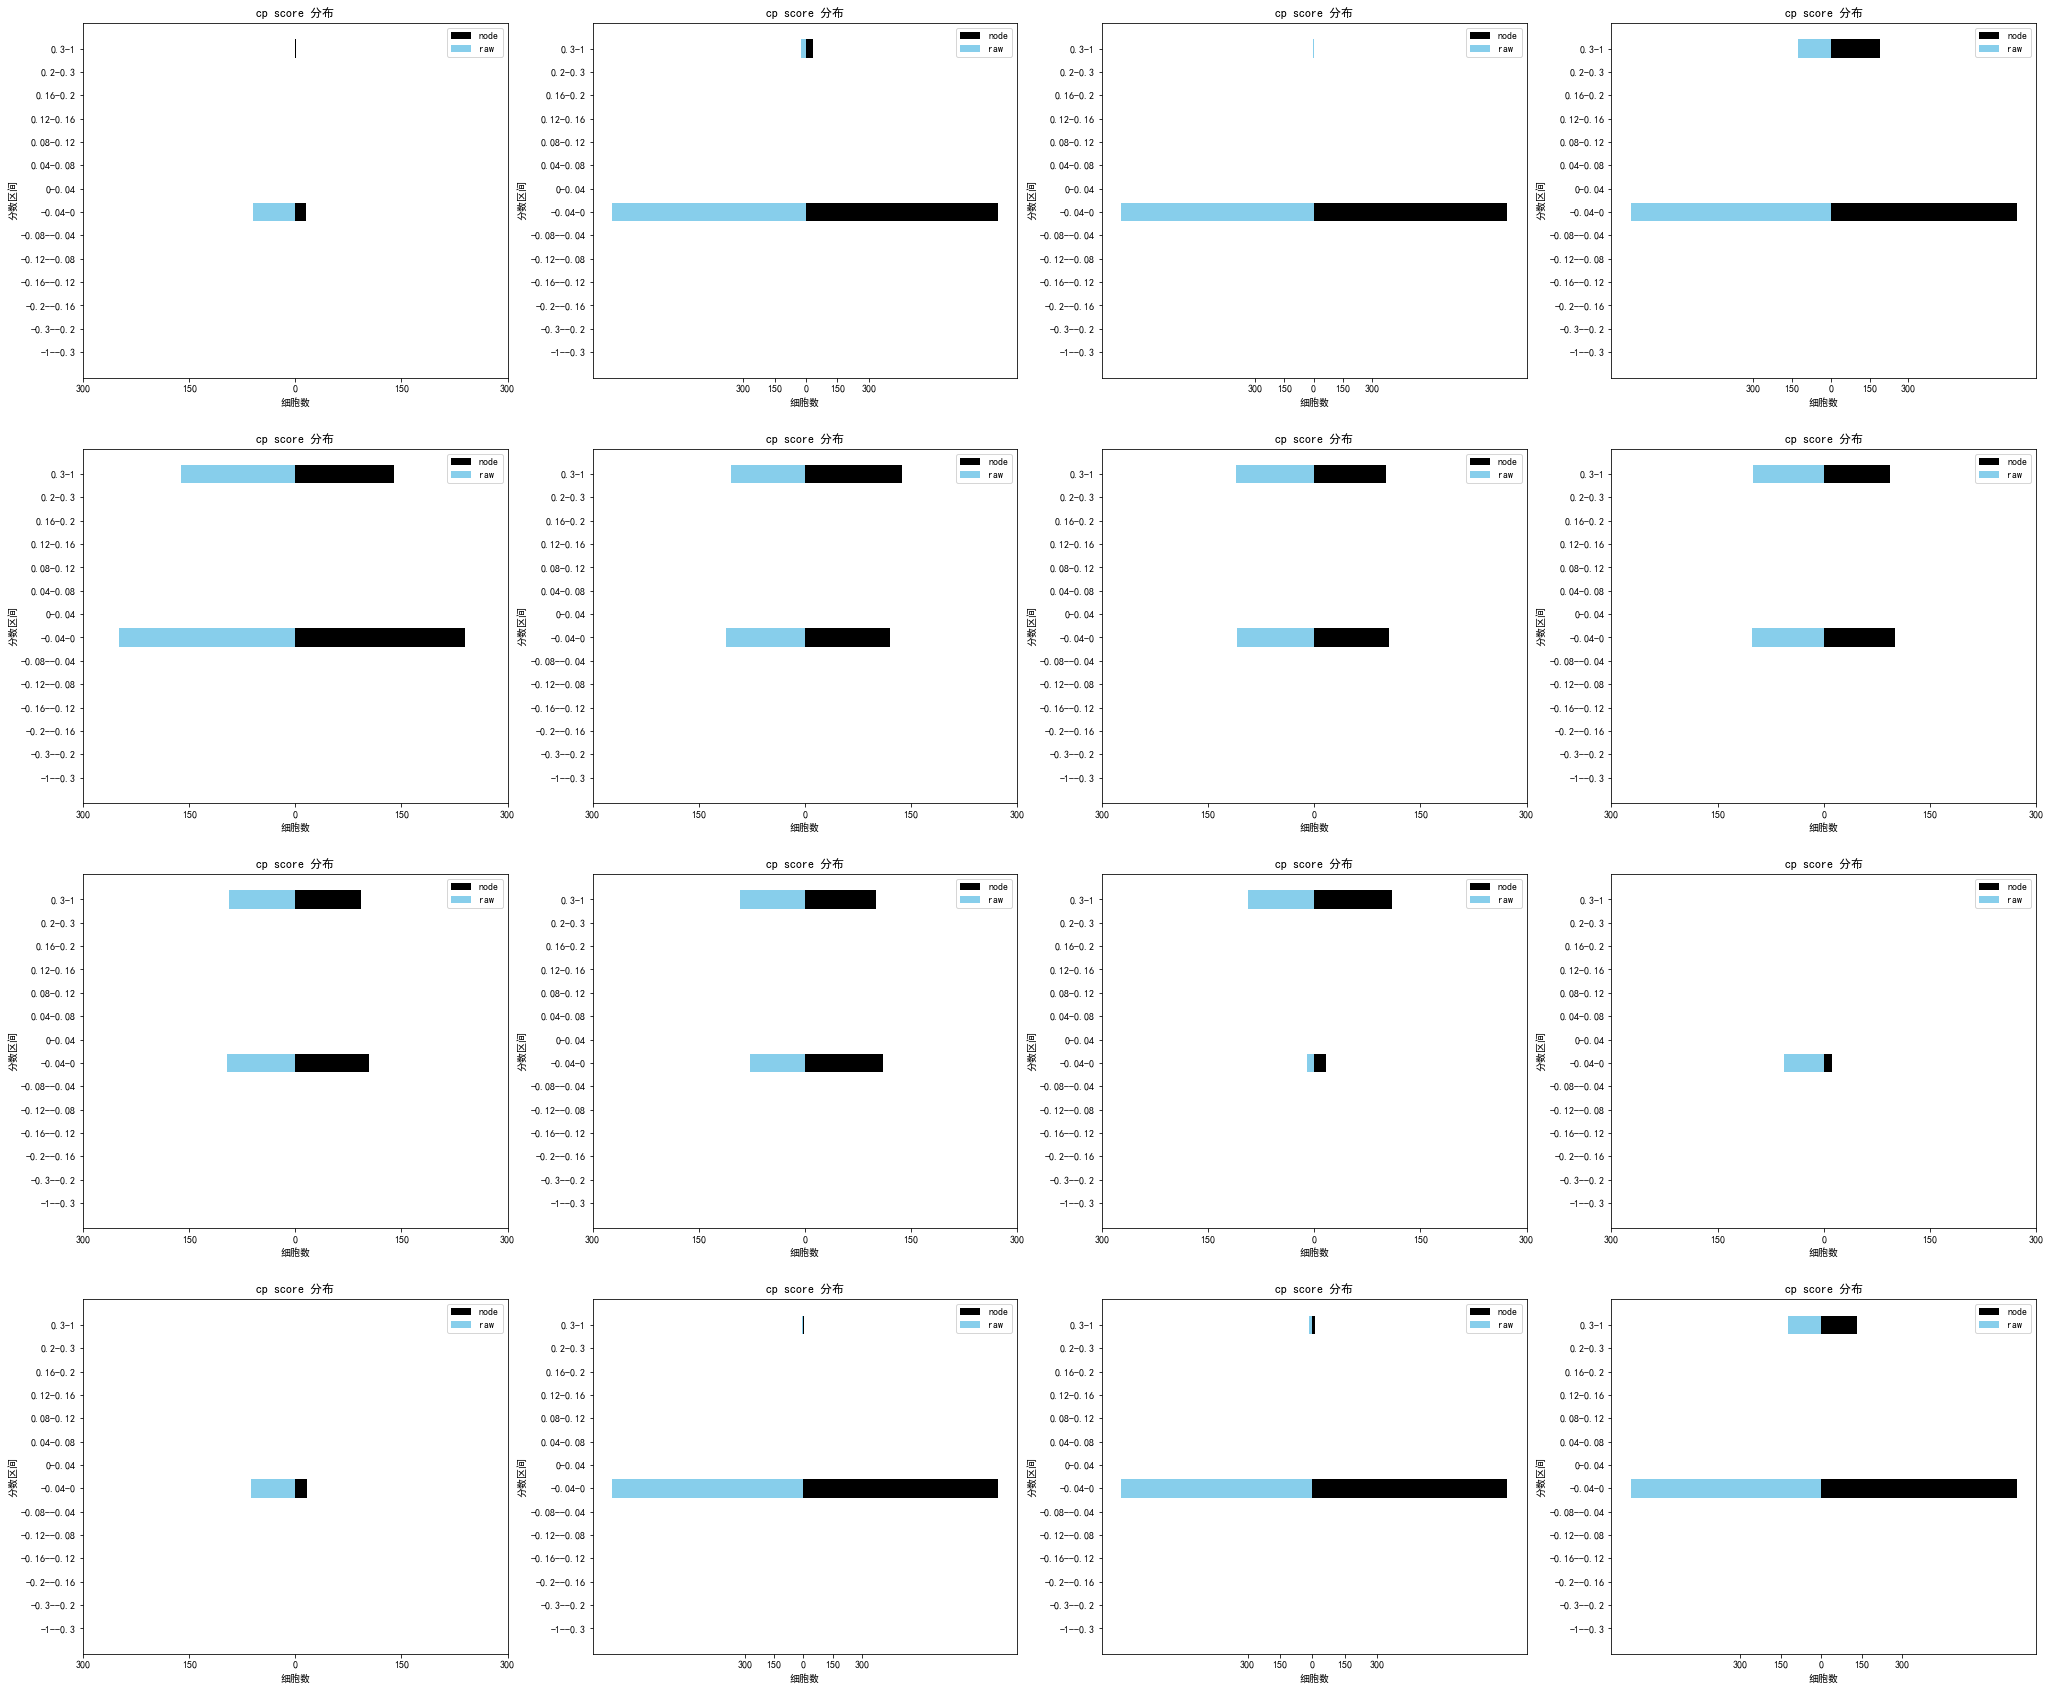

In [8]:
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
list_node=df['node'].values.tolist()
bins = [-1, -0.3, -0.2, -0.16, -0.12, -0.08, -0.04, 0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.3, 1]
y = ['-1--0.3', '-0.3--0.2', '-0.2--0.16', '-0.16--0.12', '-0.12--0.08', '-0.08--0.04', '-0.04-0', '0-0.04', '0.04-0.08', '0.08-0.12', '0.12-0.16', '0.16-0.2', '0.2-0.3', '0.3-1']
m = n = 0
fig ,axes = plt.subplots(4,4, figsize=(35,30))
for i in range(1, len(df['node'].loc[0]) - 1):
    l = []
    l2 = []
    for j in df.index:
        l.append(df['node'].loc[j][i])
        l2.append(df['raw'].loc[j][i])
    print(l)
    a = pd.cut(l, bins)
    b = pd.cut(l2, bins)
    print(a.value_counts())
    ax=axes[m, n]
    ax.barh(y,list(a.value_counts()),label='node',color='black')
    ax.barh(y,[-x for x in list(b.value_counts())],label='raw',color='skyblue')
    ax.set_ylabel("分数区间")
    ax.set_xticks([-300,-150,0,150,300])
    ax.set_xticklabels(['300','150','0','150','300'])
    ax.set_xlabel("细胞数")
    ax.set_title('cp score 分布')
    ax.legend()
    if n < 3:
        n += 1
    else :
        m += 1
        n = 0

plt.show()